{'invCellDist': <Fields.fieldContainer object at 0x7fb958f88a30>, 'u': <BaseField.baseField object at 0x7fb958f88bb0>, 'v': <BaseField.baseField object at 0x7fb958f88dc0>, 'p': <BaseField.baseField object at 0x7fb958f88f70>}
[[0. 0. 0. 0.]]
u data =  [[2. 3. 3. 3. 3.]]
v data = 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[2. 2. 2. 2. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


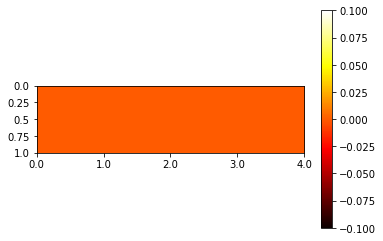

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin as backend

# validation test for incompressible flow

geom = backend.createGeometry( 'rectangle', [4,1] )
mesh = backend.createMesh( geom, res=1 )

# make just a list, give a name as optional parameter to flow model
myFlowModels = {
    #backend.FlowModels.ConstPresGrad(depVariableName='p'),
    'u' : backend.TransportModels.staggeredTransport_u,
    'v' : backend.TransportModels.staggeredTransport_v
    #'p' : backend.PressureModels.Pressure
}

passiveFields = {
    #'v' : 'faces_v',
    'p' : 'scalarCV'
}

#remove 'Simulation'. I don't need it
sim1 = backend.Simulation(flowmodels=myFlowModels, mesh=mesh, geometry=geom, passiveFields=passiveFields )

myFields = sim1.getFieldRegistry()
print(myFields)

myFlowModels['u'].setDiffusionCoefficient(0.1)
myFlowModels['v'].setDiffusionCoefficient(0.1)

p = myFields['p']
print(p.data)

u = myFields['u']
u.data.fill(3.0)

u.defineBoundaryCondition(boundaryName='top', boundaryType='zeroGradient')
u.defineBoundaryCondition(boundaryName='bottom', boundaryType='zeroGradient')
u.defineBoundaryCondition(boundaryName='left', boundaryType='fixedValue', value=2 )
u.defineBoundaryCondition(boundaryName='right', boundaryType='zeroGradient')
#U.defineBoundaryCondition(boundaryName='right', boundaryType='fixedValue', value=2)
#
v = myFields['v']
v.data.fill(3.0)

v.defineBoundaryCondition(boundaryName='top', boundaryType='fixedValue', value=0.0)
v.defineBoundaryCondition(boundaryName='bottom', boundaryType='fixedValue', value=0.0)
v.defineBoundaryCondition(boundaryName='left', boundaryType='fixedValue', value=0.0)
v.defineBoundaryCondition(boundaryName='right', boundaryType='fixedValue', value=0.0)

print('u data = ', u.data)
print('v data = \n', v.data)

u.solve()
v.solve()

print(u.data)
print(v.data)

sim1.display(p, mesh)

In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)
